# Semana 3-BrendaParra

In [93]:
import numpy as np
import ipyparallel as ipp
%matplotlib inline

In [94]:
c=ipp.Client()
c.ids

[0, 1, 2, 3]

In [95]:
c[0:2]

<DirectView [0, 1]>

In [190]:
c[1:3].apply_sync(lambda: "Hola clase de MCA")

['Hola clase de MCA', 'Hola clase de MCA']

In [189]:
c[0].map_sync(lambda x,y,z: x+y+z, [1],[2],[3])

[6]

In [191]:
c[0].map_sync(lambda x,y,z: x+y+z, range(10), range(10), range(10))

[0, 3, 6, 9, 12, 15, 18, 21, 24, 27]

In [99]:
c[:].apply_sync(lambda x,y,z: x+y+z, range(10), range(10), range(10))

[[0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9]]

In [192]:
c[:].map_sync(lambda x,y,z: x+y+z, range(10), range(10), range(10))

[0, 3, 6, 9, 12, 15, 18, 21, 24, 27]

In [101]:
%%timeit #//graficar
x=2**17
for i in np.arange(int(x**0.5)+1):
     x%i

/Users/bparra/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:259: RuntimeWarning: divide by zero encountered in long_scalars


The slowest run took 6.32 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 75.3 µs per loop


In [102]:

%%timeit
x=2**4
for i in np.arange(int(x**0.5)+1)[2:]:
     x%i


The slowest run took 10.16 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.65 µs per loop


In [103]:
x=x=2**20
np.arange(int(x**0.5)+1)


array([   0,    1,    2, ..., 1022, 1023, 1024])

In [104]:
all?

In [105]:
lambda x: all

<function __main__.<lambda>>

In [193]:
c[0].app

AttributeError: 'DirectView' object has no attribute 'app'

In [194]:
def PrimeQA(x):
    import numpy as np
    return all(x % i for i in np.arange(int(x**0.5)+1)[2:])

In [195]:
PrimeQA(2**7)

<generator object <genexpr> at 0x1180611e0>

In [196]:
c[0].apply_sync(PrimeQA, 2**7) #se utiliza en un motor

False

In [197]:
dview = c[:] # asigna todos los motores a la variable dview

In [198]:
dview.apply_sync(PrimeQA, 2**7)

[False, False, False, False]

In [199]:
2**np.arange(7)

array([ 1,  2,  4,  8, 16, 32, 64])

In [200]:
%timeit dview.map_sync(PrimeQA, 2**np.arange(25)) #Utiliza todos los motores con map_sync

10 loops, best of 3: 30.1 ms per loop


In [248]:
%%timeit
for i in np.arange(25)[2:]:
    x%i

The slowest run took 5.59 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 7.16 µs per loop


In [202]:
def PrimeQB(x):
    import numpy as np
    return np.all(np.array([x % i for i in np.arange(np.int(x**0.5)+1)[2:]]))

In [203]:
np.all(np.array([x % i for i in np.arange(np.int(x**0.5)+1)[2:]]))

False

In [204]:
%timeit dview.map_sync(PrimeQB, 2**np.arange(25)) #Utiliza todos los motores con map_sync

10 loops, best of 3: 27.1 ms per loop


In [205]:
np.mod(24,12)

0

In [206]:
24%12

0

In [207]:
np.arange(24)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [208]:
for med in np.arange(12,20):
    print np.mod(np.arange(24),med) ## rehacer esto utilizando vista con map

[ 0  1  2  3  4  5  6  7  8  9 10 11  0  1  2  3  4  5  6  7  8  9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12  0  1  2  3  4  5  6  7  8  9 10]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13  0  1  2  3  4  5  6  7  8  9]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14  0  1  2  3  4  5  6  7  8]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15  0  1  2  3  4  5  6  7]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16  0  1  2  3  4  5  6]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17  0  1  2  3  4  5]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18  0  1  2  3  4]


In [209]:
np.array([hora % 12 for hora in np.arange(24)]);

In [210]:
def PrimeQC(x):
    import numpy as np
    lista = np.arange(np.int(x**0.5)+1)[2:]
    residuos = np.mod(x,lista)
    return np.all(residuos)#np.array([x % i for i in np.arange(np.int(x**0.5)+1)[2:]]))

In [211]:
np.mod(12,np.arange(24)[2:])

array([ 0,  0,  0,  2,  0,  5,  4,  3,  2,  1,  0, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12])

In [212]:
%timeit dview.map_sync(PrimeQB, 2**np.arange(10)) 
#Probar hasta 25 para ver su eficiencia contra PrimeQC

10 loops, best of 3: 25.8 ms per loop


In [213]:
%timeit dview.map_sync(PrimeQC, 2**np.arange(10))

10 loops, best of 3: 25.9 ms per loop


In [230]:
import matplotlib.pyplot as plt
import numpy as np
lista1 = [11,2,3,15,8,13,21,34]
plt.plot(lista1)
plt.show()

SyntaxError: invalid syntax (<ipython-input-230-005733347487>, line 8)

In [215]:
%timeit dview.map_sync(PrimeQB, 2**np.arange(10))

10 loops, best of 3: 27.2 ms per loop


In [249]:
%%timeit #//graficar
x=2**17
for i in np.arange(int(x**0.5)+1)[2:]:
     x%i

10000 loops, best of 3: 73.4 µs per loop


In [250]:

%time #//graficar
x=2**17
for i in np.arange(int(x**0.5)+1)[2:]:
     x%i

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.11 µs


In [218]:
timeit?

# Tarea: Comparar tiempos de respuesta PrimeQA, PrimeQB, PrimeQC con apply_sync

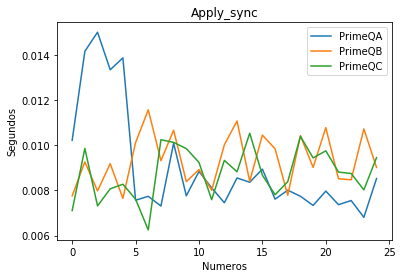

In [219]:
import matplotlib.pyplot as plt
import numpy as np

from time import time
n=25

listaA=[]
for i in np.arange(n):
    t = time()
    c[0].apply_sync(PrimeQA,2**i)
    t2=time()
    listaA.append(t2-t)
listaA

listaB=[]
for i in np.arange(n):
    t = time()
    c[0].apply_sync(PrimeQB,2**i)
    t2=time()
    listaB.append(t2-t)
listaB

listaC=[]
for i in np.arange(n):
    t = time()
    c[0].apply_sync(PrimeQC,2**i)
    t2=time()
    listaC.append(t2-t)
listaC


from pylab import *
plt.plot(listaA)
plt.plot(listaB)
plt.plot(listaC)
legend( ('PrimeQA', 'PrimeQB', 'PrimeQC'), loc='upper right')
xlabel('Numeros')
ylabel('Segundos')
title('Apply_sync')

plt.show()

# Tarea: Comparar tiempos de respuesta PrimeQA, PrimeQB, PrimeQC con map_sync

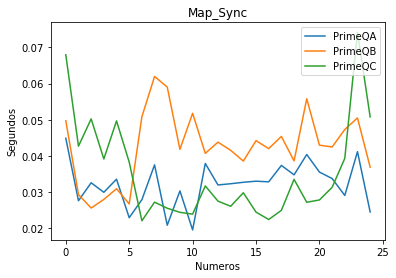

In [229]:
import matplotlib.pyplot as plt
import numpy as np

from time import time
n=25

listaMA=[]
for i in np.arange(n):
    t = time()
    dview.map_sync(PrimeQA, 2**np.arange(n))
    t2=time()
    listaMA.append(t2-t)
listaMA

listaMB=[]
for i in np.arange(n):
    t = time()
    dview.map_sync(PrimeQB, 2**np.arange(n))
    t2=time()
    listaMB.append(t2-t)
listaMB

listaMC=[]
for i in np.arange(n):
    t = time()
    dview.map_sync(PrimeQA, 2**np.arange(n))
    t2=time()
    listaMC.append(t2-t)
listaMC


from pylab import *
plt.plot(listaMA)
plt.plot(listaMB)
plt.plot(listaMC)
legend( ('PrimeQA', 'PrimeQB', 'PrimeQC'), loc='upper right')
xlabel('Numeros')
ylabel('Segundos')
title('Map_Sync')

plt.show()

# Gráficar la siguiente función

In [251]:
%%timeit #//graficar
n=25
x=2**n
for i in np.arange(int(x**0.5)+1)[2:]:
     x%i

1000 loops, best of 3: 1.17 ms per loop


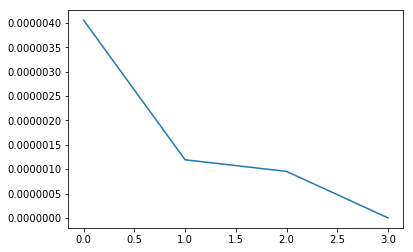

In [252]:
import matplotlib.pyplot as plt
import numpy as np

from time import time
n=5
x=2**n
lista=[]
for i in np.arange(int(x**0.5)+1)[2:]:
    t = time()
    x%i
    t2=time()
    lista.append(t2-t)
lista

from pylab import *
plt.plot(lista)